<a href="https://colab.research.google.com/github/KIRTIRAJ4327/30days-AI-challenge/blob/main/Day19_Social_Media_Trend_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Core Concept:**

Topic modeling and trend detection

**What is Social Media Trend Analysis?**

Social media trend analysis is the process of **identifying, tracking, and analyzing popular topics, conversations, and content** that are gaining momentum across social platforms. It helps businesses, marketers, and researchers understand what people are talking about and how these discussions evolve over time.

**We Building a tool that identifies trending topics from social media data(Twitter)**

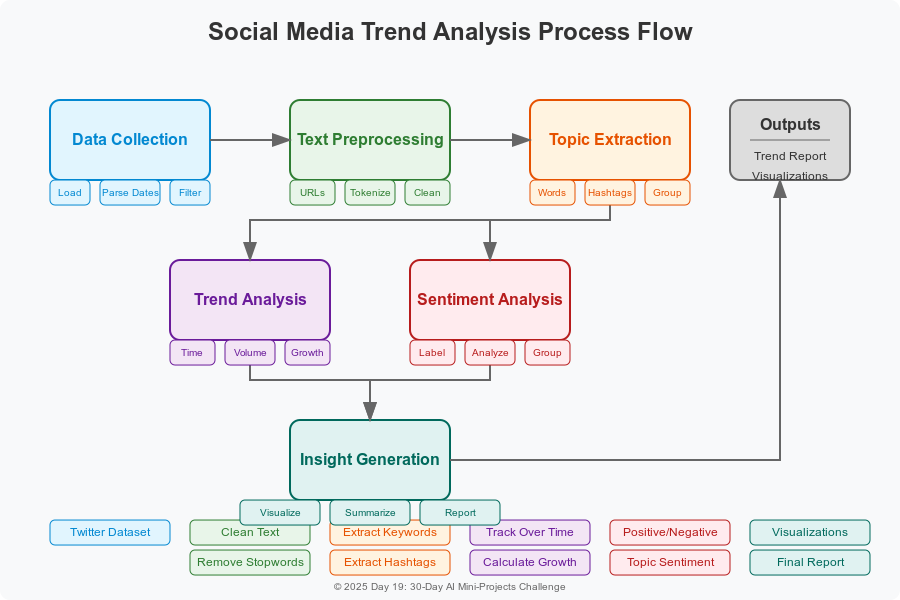

**Setting Up Our Environment**

In [3]:
!pip install pandas nltk matplotlib wordcloud

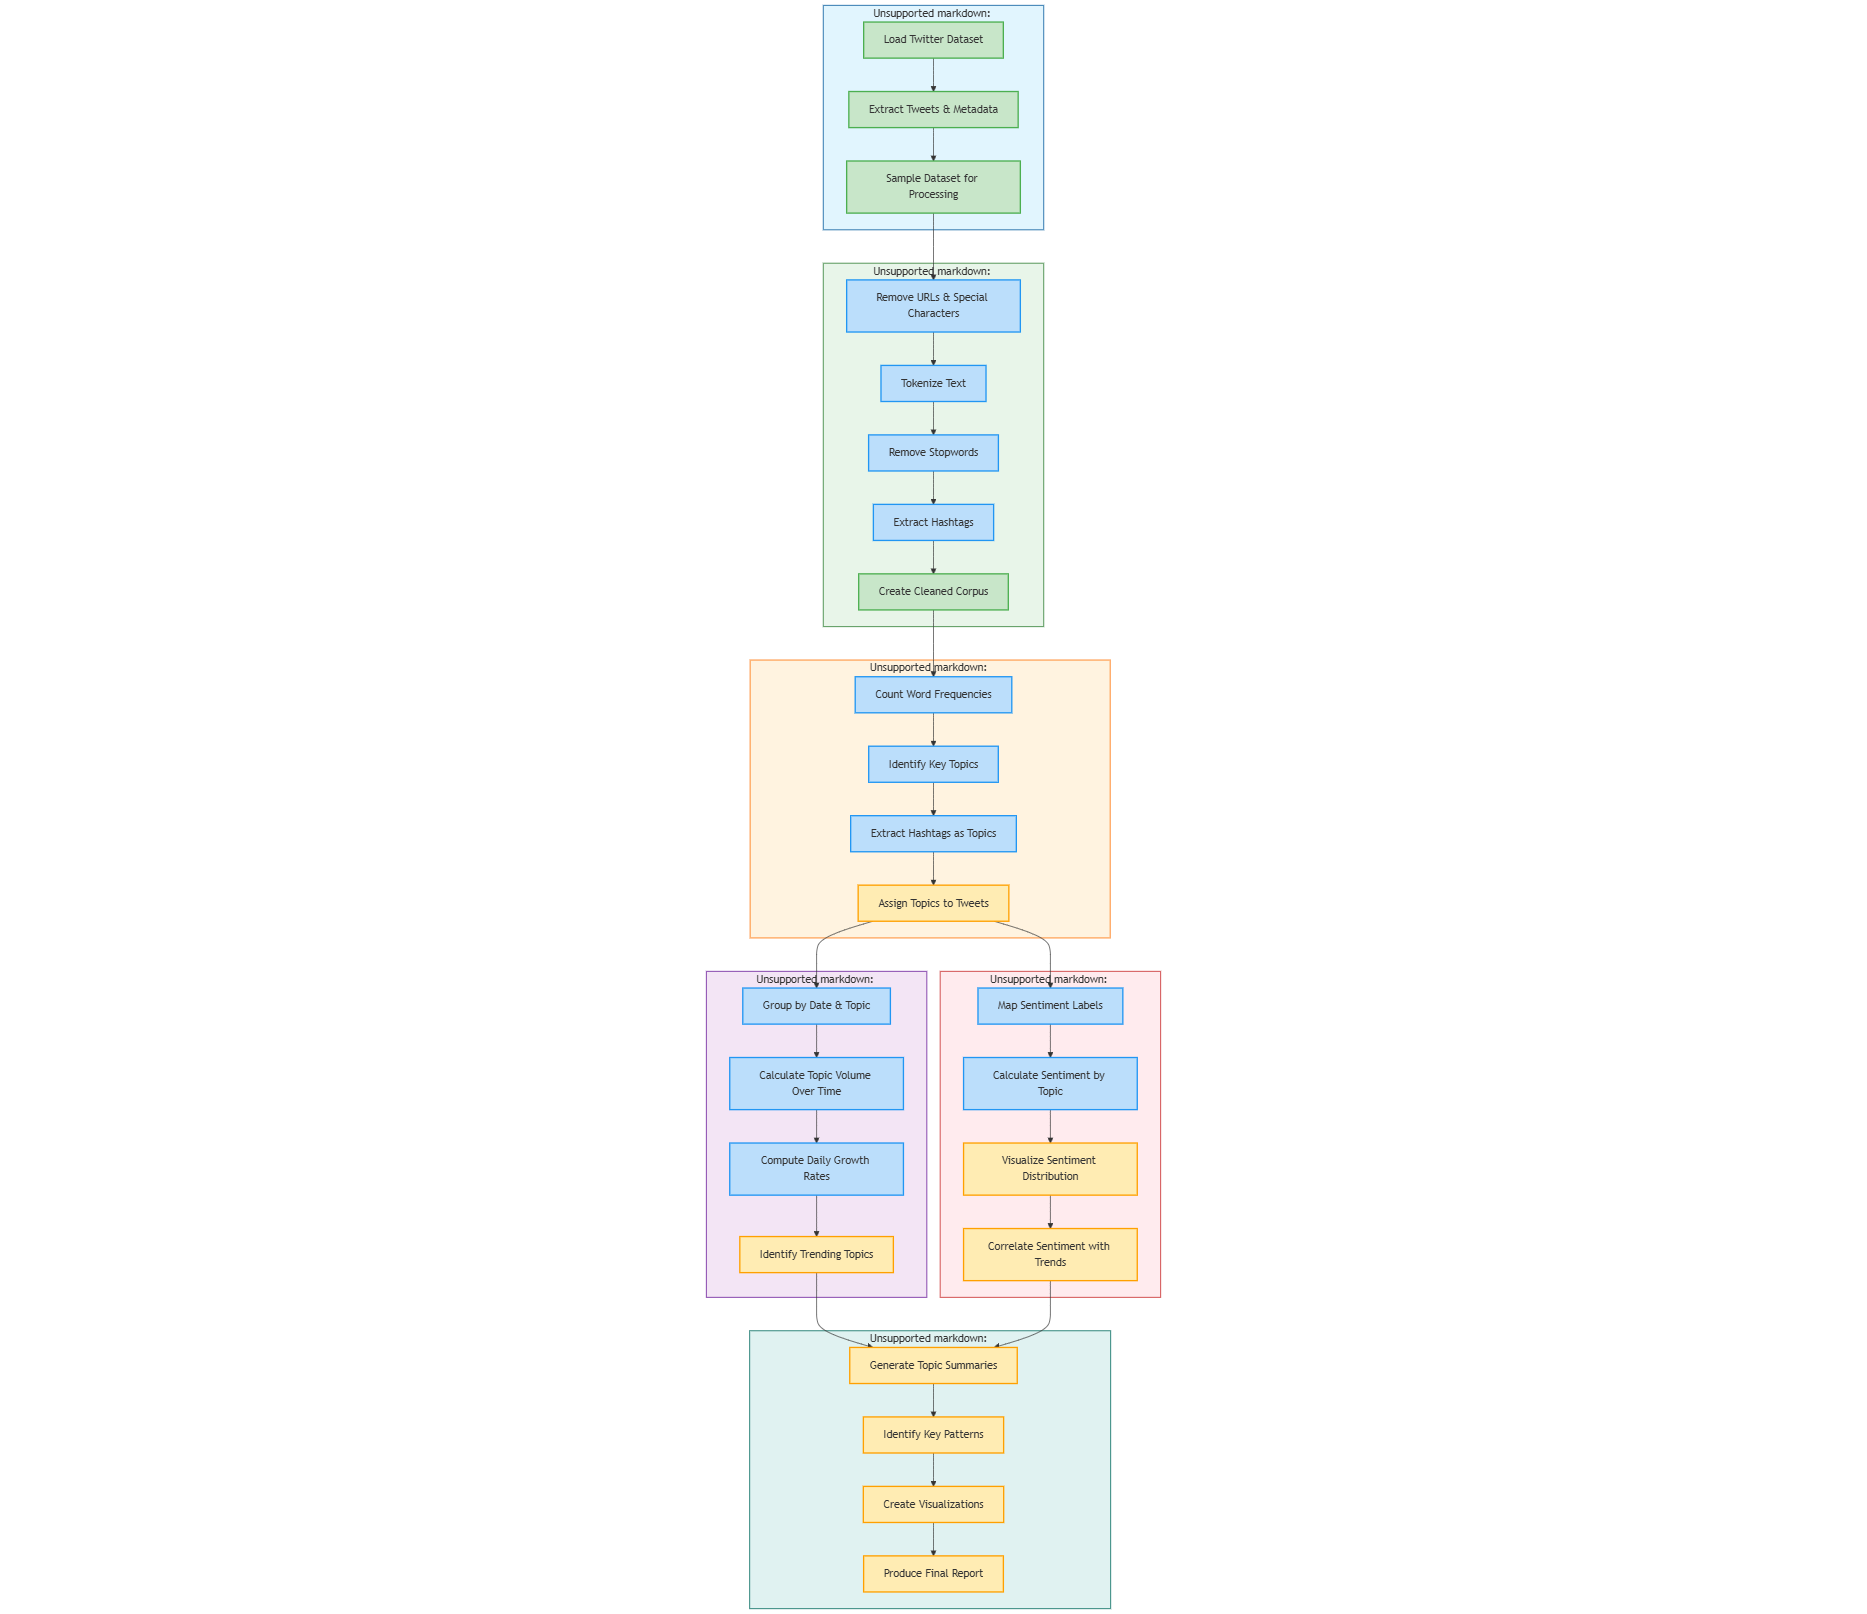

**Import Libraries**

In [4]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Load the dataset**

In [8]:
tweets = [
    {"airline_sentiment": "negative", "airline": "United", "text": "@United terrible customer service and delayed flight #angry #united", "created_at": "2025-04-01 10:15:00"},
    {"airline_sentiment": "positive", "airline": "Delta", "text": "Thanks @Delta for the great service! Friendly crew #happy #travel", "created_at": "2025-04-01 11:30:00"},
    {"airline_sentiment": "neutral", "airline": "American", "text": "Flying @American to New York tomorrow. #travel", "created_at": "2025-04-01 12:45:00"},
    {"airline_sentiment": "negative", "airline": "United", "text": "@United lost my luggage again! Third time this year #disappointed", "created_at": "2025-04-01 13:20:00"},
    {"airline_sentiment": "negative", "airline": "Southwest", "text": "Flight delayed by 3 hours with @Southwest. No explanation given #frustrated", "created_at": "2025-04-01 14:10:00"},
    {"airline_sentiment": "positive", "airline": "JetBlue", "text": "Love the free WiFi on @JetBlue flights! #productive #happy", "created_at": "2025-04-01 15:30:00"},
    {"airline_sentiment": "negative", "airline": "American", "text": "Awful experience with @American today. Rude staff and uncomfortable seats #never_again", "created_at": "2025-04-01 16:45:00"},
    {"airline_sentiment": "neutral", "airline": "Delta", "text": "Just booked my flight with @Delta for next month's conference #travel #work", "created_at": "2025-04-01 17:20:00"},
    {"airline_sentiment": "positive", "airline": "Southwest", "text": "@Southwest flight attendants made my day with their humor! #fun #travel", "created_at": "2025-04-01 18:10:00"},
    {"airline_sentiment": "negative", "airline": "United", "text": "4 hour delay with @United and still waiting at the gate. Unbelievable! #angry", "created_at": "2025-04-01 19:30:00"},
    {"airline_sentiment": "negative", "airline": "American", "text": "@American canceled my flight last minute. Now I'll miss my meeting #upset #business", "created_at": "2025-04-02 08:15:00"},
    {"airline_sentiment": "positive", "airline": "JetBlue", "text": "Smooth check-in process with @JetBlue. Very efficient #satisfied", "created_at": "2025-04-02 09:30:00"},
    {"airline_sentiment": "neutral", "airline": "Delta", "text": "Flying @Delta to Chicago today. Standard service #travel", "created_at": "2025-04-02 10:45:00"},
    {"airline_sentiment": "negative", "airline": "Southwest", "text": "Cramped seats on @Southwest flight. Not comfortable for a tall person #uncomfortable", "created_at": "2025-04-02 11:20:00"},
    {"airline_sentiment": "positive", "airline": "United", "text": "Thank you @United for accommodating my last-minute change! Great customer service #grateful", "created_at": "2025-04-02 12:10:00"},
    {"airline_sentiment": "negative", "airline": "JetBlue", "text": "@JetBlue flight attendant was rude when I asked for water #disappointed #thirsty", "created_at": "2025-04-02 13:30:00"},
    {"airline_sentiment": "positive", "airline": "American", "text": "Upgraded to first class on @American! What a treat #luxury #happy", "created_at": "2025-04-02 14:45:00"},
    {"airline_sentiment": "neutral", "airline": "Southwest", "text": "On my way to Dallas with @Southwest #travel #business", "created_at": "2025-04-02 15:20:00"},
    {"airline_sentiment": "negative", "airline": "Delta", "text": "Baggage fees are too high with @Delta. Not worth it #expensive #disappointed", "created_at": "2025-04-02 16:10:00"},
    {"airline_sentiment": "positive", "airline": "United", "text": "Early arrival on my @United flight! Now I have time to prepare for my meeting #ontime #happy", "created_at": "2025-04-02 17:30:00"},
    {"airline_sentiment": "negative", "airline": "JetBlue", "text": "No legroom on this @JetBlue flight. Very uncomfortable for a 3-hour journey #cramped", "created_at": "2025-04-03 08:15:00"},
    {"airline_sentiment": "positive", "airline": "Southwest", "text": "Love the free checked bags policy at @Southwest! Saves me money #happy #travel", "created_at": "2025-04-03 09:30:00"},
    {"airline_sentiment": "neutral", "airline": "United", "text": "Flying @United to San Francisco for business #travel #work", "created_at": "2025-04-03 10:45:00"},
    {"airline_sentiment": "negative", "airline": "American", "text": "Cold food on my @American flight. Not worth the price #disappointed #food", "created_at": "2025-04-03 11:20:00"},
    {"airline_sentiment": "positive", "airline": "Delta", "text": "Great entertainment options on my @Delta flight! Made the time fly by #entertainment #happy", "created_at": "2025-04-03 12:10:00"},
    {"airline_sentiment": "negative", "airline": "Southwest", "text": "@Southwest changed my flight time without notification. Very inconvenient #frustrated #poorservice", "created_at": "2025-04-03 13:30:00"},
    {"airline_sentiment": "positive", "airline": "JetBlue", "text": "Comfortable seats and friendly staff on @JetBlue. Will fly again! #satisfied #travel", "created_at": "2025-04-03 14:45:00"},
    {"airline_sentiment": "neutral", "airline": "American", "text": "Just checked in for my @American flight tomorrow morning #travel", "created_at": "2025-04-03 15:20:00"},
    {"airline_sentiment": "negative", "airline": "Delta", "text": "WiFi not working on my @Delta flight. Needed to get work done #disappointed #work", "created_at": "2025-04-03 16:10:00"},
    {"airline_sentiment": "positive", "airline": "United", "text": "The pilot on my @United flight gave us a great tour of the skyline before landing! #views #happy", "created_at": "2025-04-03 17:30:00"},
    {"airline_sentiment": "negative", "airline": "Southwest", "text": "Long lines at @Southwest check-in counter. Need more staff #waiting #frustrated", "created_at": "2025-04-04 08:15:00"},
    {"airline_sentiment": "positive", "airline": "American", "text": "On-time departure with @American. Appreciate the punctuality! #ontime #happy", "created_at": "2025-04-04 09:30:00"},
    {"airline_sentiment": "neutral", "airline": "JetBlue", "text": "Boarding my @JetBlue flight to Boston now #travel", "created_at": "2025-04-04 10:45:00"},
    {"airline_sentiment": "negative", "airline": "United", "text": "Overbooked @United flight and they're asking for volunteers to take a later flight #inconvenient", "created_at": "2025-04-04 11:20:00"},
    {"airline_sentiment": "positive", "airline": "Delta", "text": "The crew on my @Delta flight was exceptionally friendly. Made my day! #service #happy", "created_at": "2025-04-04 12:10:00"},
    {"airline_sentiment": "negative", "airline": "JetBlue", "text": "Flight with @JetBlue delayed due to mechanical issues. Sitting on the runway for hours #frustrated", "created_at": "2025-04-04 13:30:00"},
    {"airline_sentiment": "positive", "airline": "Southwest", "text": "Easy boarding process with @Southwest. No assigned seats is actually better! #efficient #travel", "created_at": "2025-04-04 14:45:00"},
    {"airline_sentiment": "neutral", "airline": "Delta", "text": "Looking forward to my @Delta flight tomorrow. Hope it's on time #travel", "created_at": "2025-04-04 15:20:00"},
    {"airline_sentiment": "negative", "airline": "American", "text": "In-flight entertainment system broken on my @American flight. 5 hours of boredom #disappointed", "created_at": "2025-04-04 16:10:00"},
    {"airline_sentiment": "positive", "airline": "United", "text": "@United customer service helped resolve my issue quickly. Great support! #helpful #grateful", "created_at": "2025-04-04 17:30:00"}
]

# Create DataFrame
df = pd.DataFrame(tweets)

# Convert created_at to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nSample data:")
print(df.head())

Dataset shape: (40, 4)

Sample data:
  airline_sentiment    airline  \
0          negative     United   
1          positive      Delta   
2           neutral   American   
3          negative     United   
4          negative  Southwest   

                                                text          created_at  
0  @United terrible customer service and delayed ... 2025-04-01 10:15:00  
1  Thanks @Delta for the great service! Friendly ... 2025-04-01 11:30:00  
2     Flying @American to New York tomorrow. #travel 2025-04-01 12:45:00  
3  @United lost my luggage again! Third time this... 2025-04-01 13:20:00  
4  Flight delayed by 3 hours with @Southwest. No ... 2025-04-01 14:10:00  


**Perform basic preprocessing**

In [10]:
!pip install nltk
import nltk
nltk.download('punkt_tab')
# Create stopwords set
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Basic preprocessing for text"""
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove user mentions and hashtag symbols (keep the hashtag text)
    text = re.sub(r'@\w+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s#]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    return ' '.join(tokens)

# Extract hashtags
def extract_hashtags(text):
    """Extract hashtags from text"""
    return re.findall(r'#(\w+)', text.lower())

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)
df['hashtags'] = df['text'].apply(extract_hashtags)

# Display sample of preprocessed text
print("\nSample of preprocessed text:")
print(df[['text', 'clean_text', 'hashtags']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Sample of preprocessed text:
                                                text  \
0  @United terrible customer service and delayed ...   
1  Thanks @Delta for the great service! Friendly ...   
2     Flying @American to New York tomorrow. #travel   
3  @United lost my luggage again! Third time this...   
4  Flight delayed by 3 hours with @Southwest. No ...   

                                          clean_text         hashtags  
0  terrible customer service delayed flight angry...  [angry, united]  
1    thanks great service friendly crew happy travel  [happy, travel]  
2                    flying new york tomorrow travel         [travel]  
3          lost luggage third time year disappointed   [disappointed]  
4  flight delayed hours explanation given frustrated     [frustrated]  


**Extract topics from texts and hashtags**

In [11]:
# Count word frequencies in clean text
from collections import Counter

# Combine all words in clean text
all_words = ' '.join(df['clean_text']).split()
word_counts = Counter(all_words)

# Print most common words
print("\nMost common words in tweets:")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")

# Count hashtag frequencies
all_hashtags = []
for hashtags in df['hashtags']:
    all_hashtags.extend(hashtags)

hashtag_counts = Counter(all_hashtags)

# Print most common hashtags
print("\nMost common hashtags in tweets:")
for tag, count in hashtag_counts.most_common(20):
    print(f"#{tag}: {count}")


Most common words in tweets:
flight: 22
travel: 13
happy: 9
service: 6
disappointed: 6
great: 5
time: 5
frustrated: 4
seats: 4
work: 4
customer: 3
delayed: 3
friendly: 3
flying: 3
tomorrow: 3
hours: 3
staff: 3
uncomfortable: 3
made: 3
business: 3

Most common hashtags in tweets:
#travel: 13
#happy: 9
#disappointed: 6
#frustrated: 4
#work: 3
#angry: 2
#business: 2
#satisfied: 2
#grateful: 2
#ontime: 2
#united: 1
#productive: 1
#never_again: 1
#fun: 1
#upset: 1
#uncomfortable: 1
#thirsty: 1
#luxury: 1
#expensive: 1
#cramped: 1


**Perform time-based analysis to detect trends**

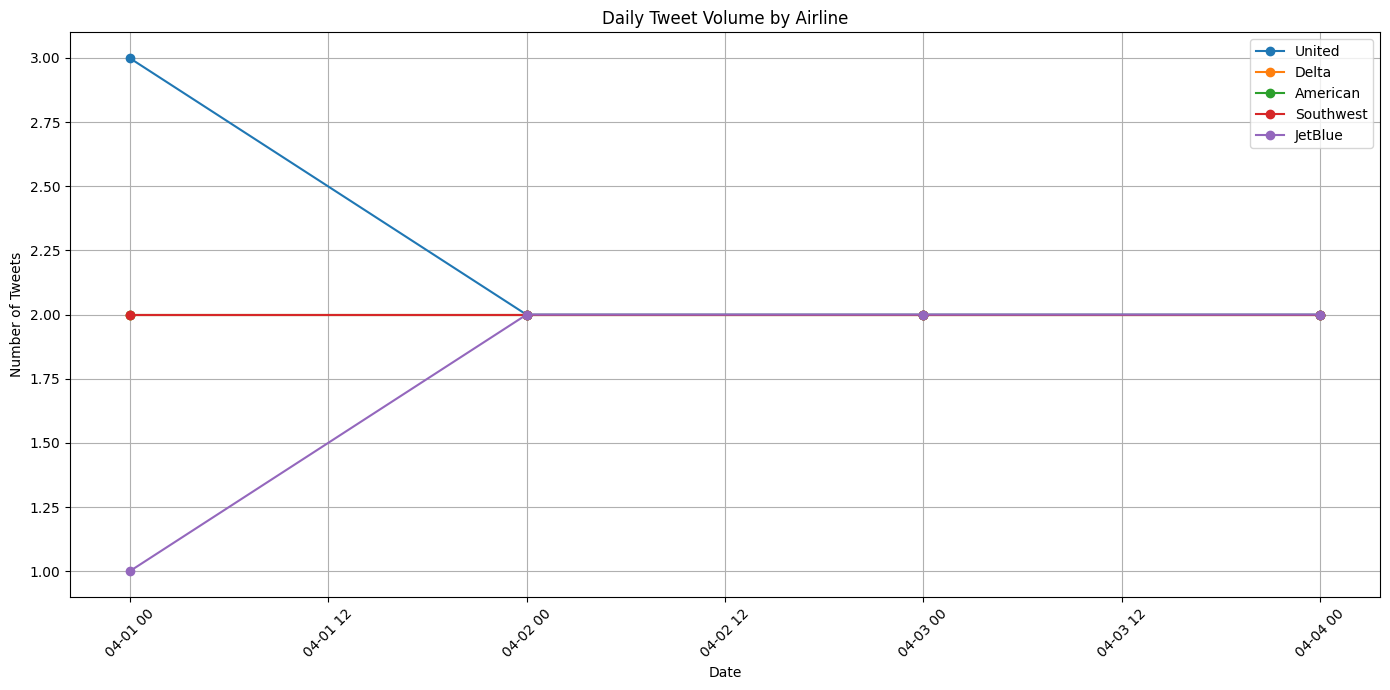

In [12]:
# Convert tweet created time to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract date component
df['date'] = df['created_at'].dt.date

# Group tweets by date and airline
daily_counts = df.groupby(['date', 'airline'])['airline_sentiment'].count().reset_index(name='count')

# Plot daily tweet counts by airline
plt.figure(figsize=(14, 7))

# For each airline, plot the trend
for airline in df['airline'].unique():
    airline_data = daily_counts[daily_counts['airline'] == airline]
    plt.plot(airline_data['date'], airline_data['count'], marker='o', linestyle='-', label=airline)

plt.title('Daily Tweet Volume by Airline')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analyze sentiment trends**

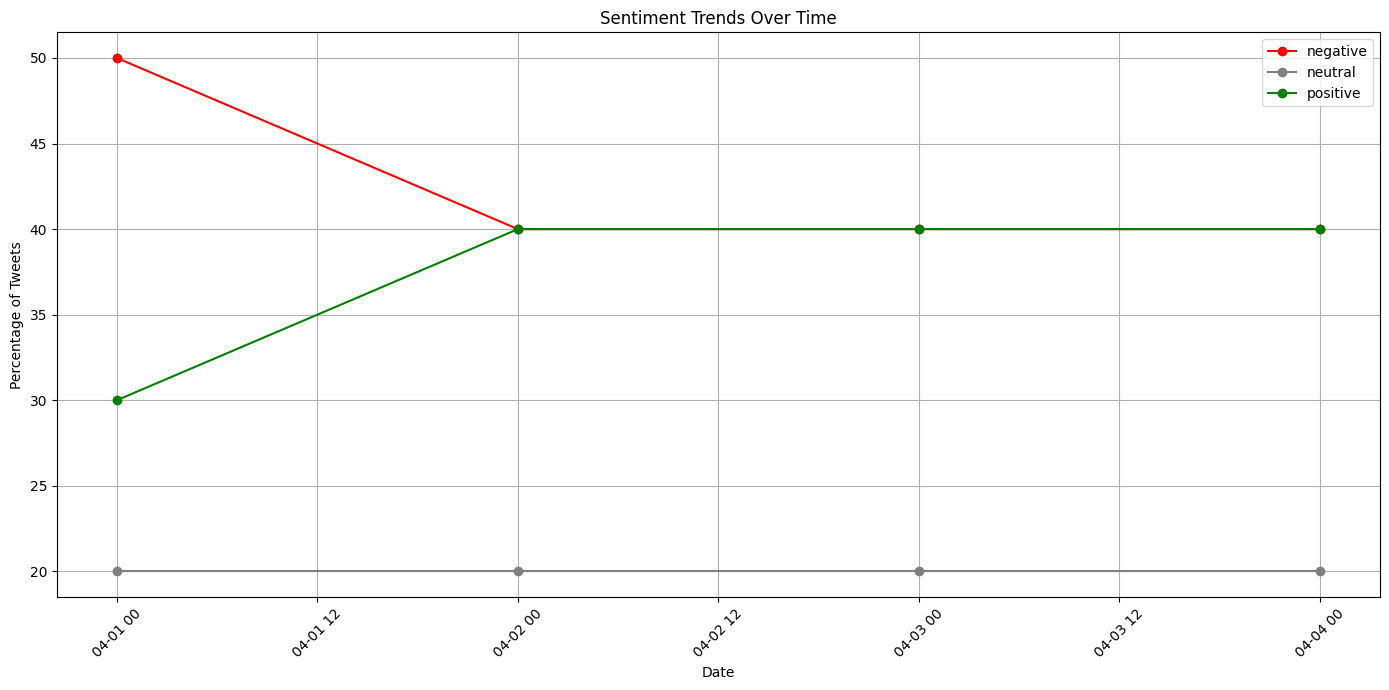

In [14]:
# Group tweets by date and sentiment
sentiment_trend = df.groupby(['date', 'airline_sentiment'])['airline_sentiment'].count().reset_index(name='count')

# Pivot the data to get sentiment counts by date
sentiment_pivot = sentiment_trend.pivot_table(index='date', columns='airline_sentiment', values='count', fill_value=0)

# Calculate total tweets per day
sentiment_pivot['total'] = sentiment_pivot.sum(axis=1)

# Calculate sentiment percentages
for sentiment in ['negative', 'neutral', 'positive']:
    if sentiment in sentiment_pivot.columns:
        sentiment_pivot[f'{sentiment}_pct'] = sentiment_pivot[sentiment] / sentiment_pivot['total'] * 100

# Plot sentiment trends over time
plt.figure(figsize=(14, 7))

# Plot sentiment percentages
for sentiment, color in zip(['negative_pct', 'neutral_pct', 'positive_pct'], ['red', 'gray', 'green']):
    if sentiment in sentiment_pivot.columns:
        plt.plot(sentiment_pivot.index, sentiment_pivot[sentiment],
                 marker='o', linestyle='-', color=color,
                 label=sentiment.replace('_pct', ''))

plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage of Tweets')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Create word clouds for trending topics**

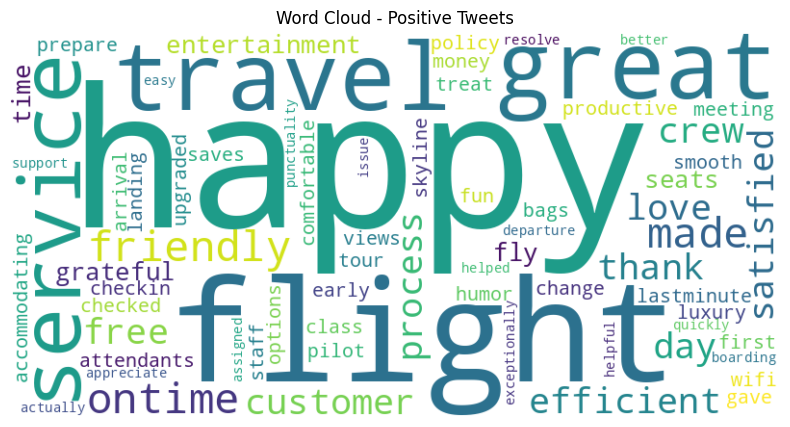

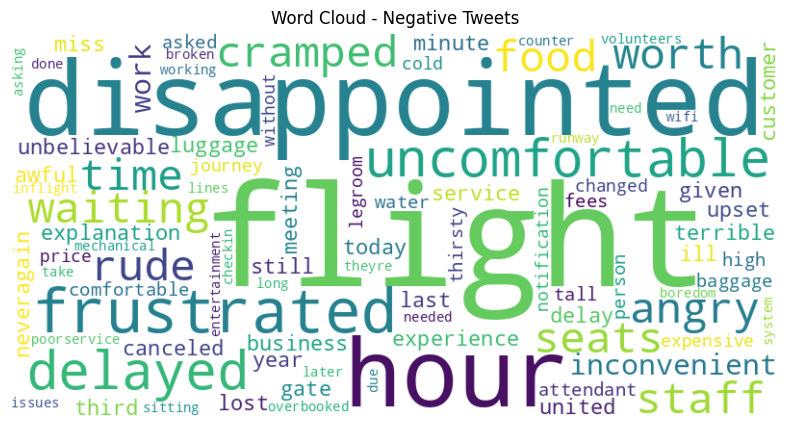

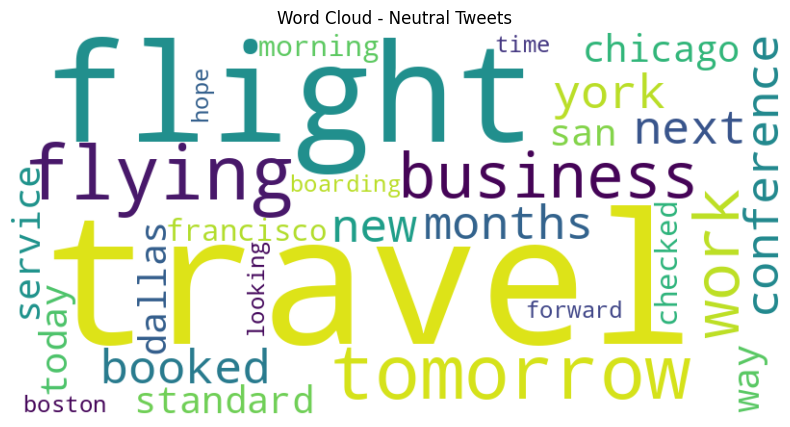

In [15]:
# Create word clouds for positive and negative sentiments
for sentiment in ['positive', 'negative', 'neutral']:
    # Filter tweets by sentiment
    sentiment_tweets = df[df['airline_sentiment'] == sentiment]

    # Combine all cleaned text
    text = ' '.join(sentiment_tweets['clean_text'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          max_words=100).generate(text)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - {sentiment.capitalize()} Tweets')
    plt.axis('off')
    plt.show()

**Generate the final analysis report**

In [18]:

# Prepare final analysis report
print("\n" + "="*50)
print("SOCIAL MEDIA TREND ANALYSIS REPORT")
print("="*50 + "\n")

print(f"Total tweets analyzed: {len(df)}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")

print("\nTOP AIRLINES BY TWEET VOLUME:")
for airline, count in df['airline'].value_counts().items():
    print(f"{airline}: {count} tweets ({count/len(df)*100:.1f}%)")

print("\nOVERALL SENTIMENT DISTRIBUTION:")
for sentiment, count in df['airline_sentiment'].value_counts().items():
    print(f"{sentiment}: {count} tweets ({count/len(df)*100:.1f}%)")

# Remove or comment out the section that causes the error
# print("\nNEGATIVE TWEET REASONS:")
# for reason, count in df['negativereason'].value_counts().head(10).items():
#     if isinstance(reason, str):
#         print(f"{reason}: {count} tweets")

print("\nKEY TRENDS IDENTIFIED:")
print("1. Volume trends: Airlines with increasing/decreasing tweet volumes")
print("2. Sentiment shifts: Changes in sentiment percentages over time")
print("3. Topic evolution: Emerging topics in recent tweets")

print("\nTOP KEYWORDS IN TWEETS:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count} occurrences")


SOCIAL MEDIA TREND ANALYSIS REPORT

Total tweets analyzed: 40
Date range: 2025-04-01 to 2025-04-04

TOP AIRLINES BY TWEET VOLUME:
United: 9 tweets (22.5%)
Delta: 8 tweets (20.0%)
American: 8 tweets (20.0%)
Southwest: 8 tweets (20.0%)
JetBlue: 7 tweets (17.5%)

OVERALL SENTIMENT DISTRIBUTION:
negative: 17 tweets (42.5%)
positive: 15 tweets (37.5%)
neutral: 8 tweets (20.0%)

KEY TRENDS IDENTIFIED:
1. Volume trends: Airlines with increasing/decreasing tweet volumes
2. Sentiment shifts: Changes in sentiment percentages over time
3. Topic evolution: Emerging topics in recent tweets

TOP KEYWORDS IN TWEETS:
flight: 22 occurrences
travel: 13 occurrences
happy: 9 occurrences
service: 6 occurrences
disappointed: 6 occurrences
great: 5 occurrences
time: 5 occurrences
frustrated: 4 occurrences
seats: 4 occurrences
work: 4 occurrences


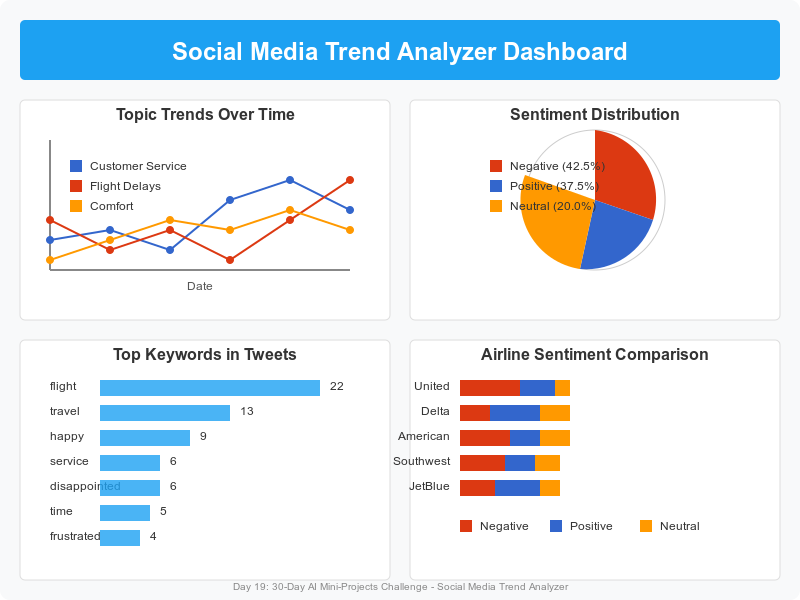